In [1]:
import numpy as np

### Biblioteca para visualização
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Tamanho:  206  x  300


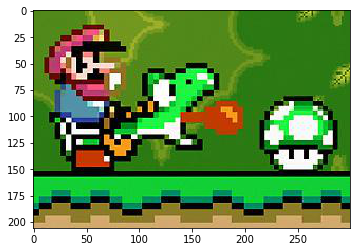

In [2]:
# Carrega um arquivo de imagem em uma matriz de formato mxnx3 (altura x largura x canais de cores RGB)
img = mpimg.imread('img/mario.jpg')

# Informações da image
print("Tamanho: ", img.shape[0] ,' x ', img.shape[1]  )
plt.imshow(img)
plt.show()

In [59]:
## Função para converter RGB para tons de cinza 
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

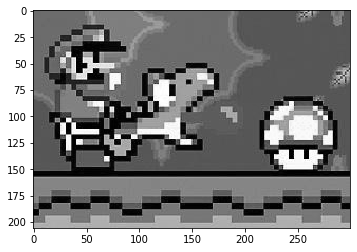

In [60]:
img_gray = rgb2gray(img)
plt.imshow(img_gray, cmap = 'gray')
plt.show() 

In [61]:
import math

def convertIntToBitArray(valor):
    binary_array = np.zeros((8), dtype=np.float64)
    numbers = np.zeros((8), dtype=np.int)
    cont = 0
    x = valor
    while x > 0:
        resto = x%2
        binary_array[cont] = resto
        numbers [cont] = x
        x = math.floor(x/2)
        cont = cont + 1
        
    return np.flip(binary_array)
    


In [62]:
def convertBitArrayToInt(bitlist):
    out = 0
    for bit in bitlist:
        out = (out << 1) | int(bit)
    return out

In [70]:
## Exemplo de uso
### Converte inteiro para arrray de bits
vet_bit = convertIntToBitArray(200.0)
print(vet_bit)
### Converte array de bits para inteiro
num_int = convertBitArrayToInt(vet_bit)
print(num_int)

[1. 1. 0. 0. 1. 0. 0. 0.]
200


In [132]:
'''
Esta função zera os bits dos pixels, 
Com order = 0, é zerado os bits mais significativos para o menos
Com order = 1, é zerado os bits menos significativos para o mais
Exemplo: 

    cleanBitLayers(input_img, bit_layer = 5, order = 1)
    pixel de entrada  = [1, 1, 1, 1, 1, 1, 1, 1]
    pixel de saída    = [1, 1, 1, 1, 1, 0, 0, 0]
    
    cleanBitLayers(input_img, bit_layer = 3, order = 0)
    pixel de entrada  = [1, 1, 1, 1, 1, 1, 1, 1]
    pixel de saída    = [0, 0, 0, 0, 0, 1, 1, 1]
'''
def cleanBitLayers(input_img, bit_layer = 0, order = 0):
    linhas  = input_img.shape[0]
    colunas = input_img.shape[1]
    output_img =  np.zeros([(linhas),(colunas)])
    for l in range(linhas):
        for c  in range(colunas):
            ## Converte o pixel para um array de bits
            array_bits  = convertIntToBitArray(valor = int(input_img[l][c]))
            ## Percorre o array de bits para decidir qual pixel continua ou zera
            for b in range(0, 8):
                if b <= bit_layer and order == 1:
                    array_bits[b] = array_bits[b]
                elif b >= bit_layer and order == 0:
                    array_bits[b] = array_bits[b]
                else:
                    array_bits[b] = 0
            ## Converte o array de bits para inteiro e coloca no destino
            output_img[l][c] = convertBitArrayToInt(array_bits)
    plt.imshow(output_img, cmap = 'gray')
    plt.show()

Com os 1 ultimos bits menos signicativos


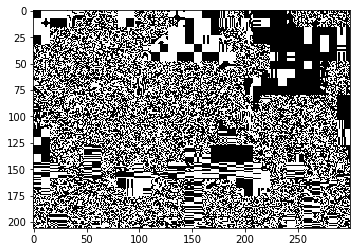

Com os 2 ultimos bits menos signicativos


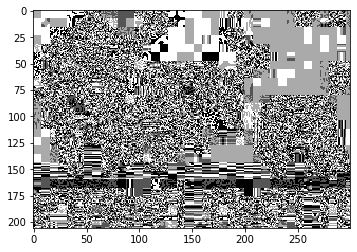

Com os 3 ultimos bits menos signicativos


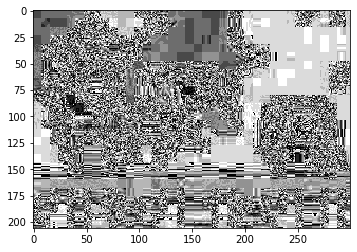

Com os 4 ultimos bits menos signicativos


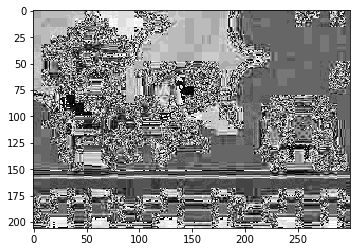

Com os 5 ultimos bits menos signicativos


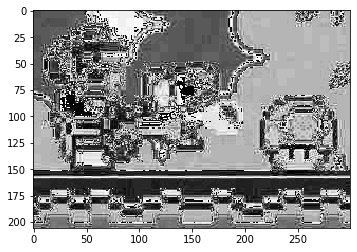

Com os 6 ultimos bits menos signicativos


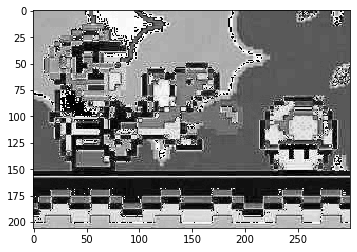

Com os 7 ultimos bits menos signicativos


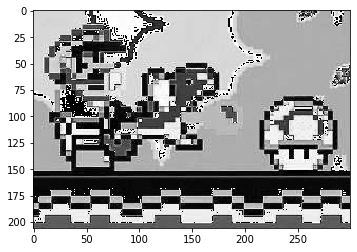

Com os 8 ultimos bits menos signicativos


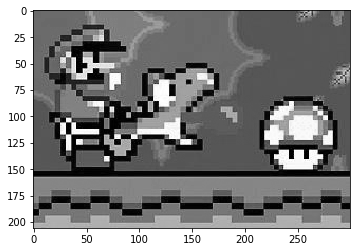

In [142]:
for i in range(8):
    print(f'Com os {i + 1} bits menos signicativos')
    cleanBitLayers(img_gray, bit_layer = 7 - i, order = 0)

Com os 1 primeiros bits mais signicativos


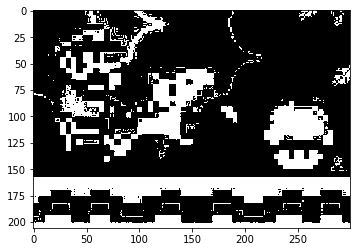

Com os 2 primeiros bits mais signicativos


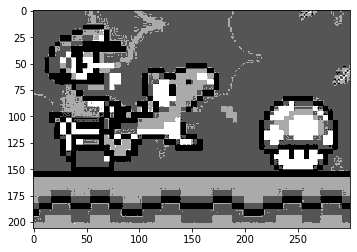

Com os 3 primeiros bits mais signicativos


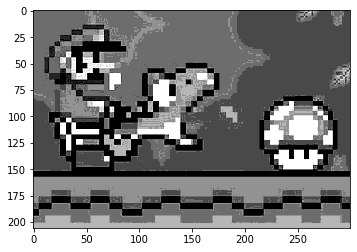

Com os 4 primeiros bits mais signicativos


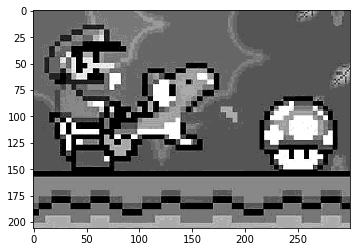

Com os 5 primeiros bits mais signicativos


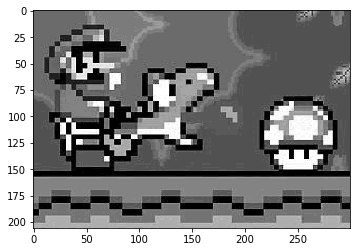

Com os 6 primeiros bits mais signicativos


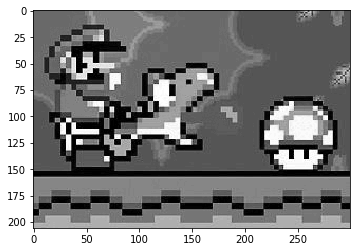

Com os 7 primeiros bits mais signicativos


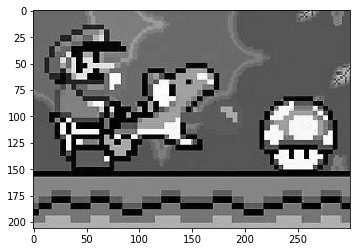

Com os 8 primeiros bits mais signicativos


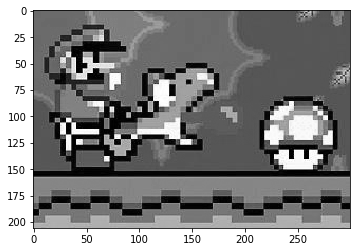

In [143]:
for i in range(8):
    print(f'Com os {i+1} bits mais signicativos')
    cleanBitLayers(img_gray, bit_layer = i, order = 1)

## Observação

Note que os bits menos significativos quase não faz diferença logo, é possível usar os bits mais significativos de uma imagem A no lugar dos menos significativos de outra B, assim a imagem B não sofrerá alterações visiveis, e vc poderá recuperar os bits da imagem A para monta-la. Isso é constantemente utilizado para troca de informações ocultas pela web. Porém, está sujeito a perca de informações a medida que os dados trafegam ou passam por algum processo de compressão.